# report
## Blatt 8 Aufgabe 2

In [26]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
#import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## loading datasets

In [27]:
advertisement = pd.read_csv('advertisement.csv')

# deleting first column of dataframe
advertisement = advertisement.iloc[: , 1:]

In [28]:
print(advertisement.shape)
advertisement.head()
#advertisement.shape

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
advertisement_X = advertisement.loc[: , advertisement.columns != 'Sales']
#advertisement_X = preprocessing.normalize(advertisement_X, axis=0)
advertisement_y = advertisement.loc[: , 'Sales']

In [30]:
data_X = advertisement_X
data_y = advertisement_y

In [31]:
print(data_X.shape)
print(data_y.shape)

(200, 3)
(200,)


In [32]:
iterations = 50

## linear regression function

In [33]:
def augment(X):
    return np.column_stack((np.ones(X.shape[0]), X))

In [34]:
def f_hat (w, X):
    return w @ X.T

In [35]:
w = np.array([0.0, 1.0])
print(w.T)
X = np.array([
    [1.0, 3.0],
    [1.0, 5.0],
    [1.0, 4.0]
])
print(X)
f_hat(w, X)

[0. 1.]
[[1. 3.]
 [1. 5.]
 [1. 4.]]


array([3., 5., 4.])

## linear regression on single features

In [36]:
nb_weights = 1+1
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([data_X.shape[1], nb_weights])
R2_mean = np.zeros([data_X.shape[1]])

for col in np.arange(data_X.shape[1]):
    for i in np.arange(iterations):
        X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, train_size=0.75)
        X = augment(X_train.iloc[:, col])
        w = inv(X.T @ X) @ X.T @ y_train
        w_opt[i] = w
        R2_scores[i] = r2_score(y_test, f_hat(w, augment(X_test.iloc[:, col])))
    w_mean[col] = w_opt.mean(axis=0)
    R2_mean[col] = R2_scores.mean()

In [37]:
print(w_mean)
print(R2_mean)
print(np.around(R2_mean*100,2))

[[ 6.98620715  0.04783594]
 [ 9.31815791  0.20159325]
 [12.38735005  0.05533112]]
[0.57097935 0.31109157 0.00462778]
[57.1  31.11  0.46]


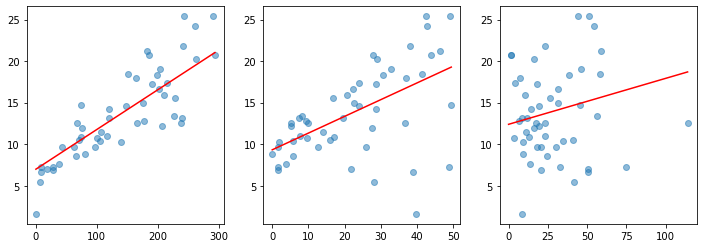

In [38]:
fig=plt.figure(figsize=(12, 4))

for i in np.arange(data_X.shape[1]):
    ax = plt.subplot(1, 3,i+1)
    fig.add_subplot(ax)
    plt.scatter(X_test.iloc[:, i], y_test, alpha=0.5)
    xs = np.linspace(0.0, X_test.iloc[:, i].max(), X_test.shape[0])
    ys = f_hat(w_mean[i], augment(xs))
    plt.plot(xs, ys, c='r')
    
#plt.savefig('single_feature_LR_advertisement.png')
plt.show()

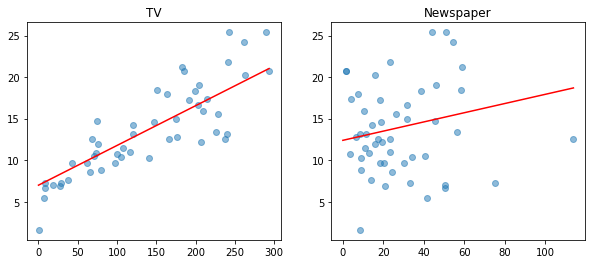

In [39]:
fig=plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax.title.set_text('TV')
fig.add_subplot(ax)
plt.scatter(X_test.iloc[:, 0], y_test, alpha=0.5)
xs = np.linspace(0.0, X_test.iloc[:, 0].max(), X_test.shape[0])
ys = f_hat(w_mean[0], augment(xs))
plt.plot(xs, ys, c='r')

ax = plt.subplot(1, 2, 2)
ax.title.set_text('Newspaper')
fig.add_subplot(ax)
plt.scatter(X_test.iloc[:, 2], y_test, alpha=0.5)
xs = np.linspace(0.0, X_test.iloc[:, 2].max(), X_test.shape[0])
ys = f_hat(w_mean[2], augment(xs))
plt.plot(xs, ys, c='r')


plt.savefig('single_feature_LR_advertisement.png')
plt.show()

# linear regression on all features

In [15]:
#reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression(normalize=True).fit(X_train, y_train)
print("training score:\t", reg.score(X_train, y_train))
print("test score:\t", reg.score(X_test, y_test)) # R2 score
print(np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0))

training score:	 0.8869568090855806
test score:	 0.9249122687342896
[2.95720626e+00 4.52784492e-02 1.88824592e-01 1.69271791e-03]


In [16]:
nb_weights = data_X.shape[1]+1
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([nb_weights])

for i in np.arange(iterations):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, train_size=0.75)
    reg = LinearRegression(normalize=True).fit(X_train, y_train)
    w = np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0)
    w_opt[i] = w
    R2_scores[i] = reg.score(X_test, y_test)
    
w_mean = w_opt.mean(axis=0)
R2_mean = R2_scores.mean()

In [17]:
print(w_mean)
print(R2_mean)
print(np.around(R2_mean*100,2))

[ 2.96528285e+00  4.57585753e-02  1.87319085e-01 -1.05951359e-03]
0.8906828094221146
89.07


In [18]:
all_features = pd.DataFrame(w_mean, ['bias', 'w1', 'w2', 'w3'])

In [19]:
all_features

,0
bias,2.965283
w1,0.045759
w2,0.187319
w3,-0.001060


# linear regression (leave one feature out)

In [20]:
nb_weights = data_X.shape[1]
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([data_X.shape[1], nb_weights])
R2_mean = np.zeros([data_X.shape[1]])

for f, col in enumerate(data_X):
    X = data_X.loc[:, data_X.columns != col]
    for i in np.arange(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size=0.25, train_size=0.75)
        reg = LinearRegression(normalize=True).fit(X_train, y_train)
        w = np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0)
        
        w_opt[i] = w
        R2_scores[i] = reg.score(X_test, y_test)
        
    w_mean[f] = w_opt.mean(axis=0)
    R2_mean[f] = R2_scores.mean()

In [21]:
print(w_mean)
print(R2_mean)
print(np.around(R2_mean*100,2))

[[9.30127752e+00 1.95080864e-01 5.32030217e-03]
 [5.75212111e+00 4.71129185e-02 4.39889226e-02]
 [2.96136482e+00 4.57374556e-02 1.86335321e-01]]
[0.33451026 0.61528364 0.89469428]
[33.45 61.53 89.47]


In [22]:
df = pd.DataFrame(w_mean, ['TV', 'Radio', 'Newspaper'])

In [23]:
df

,0,1,2
TV,9.301278,0.195081,0.005320
Radio,5.752121,0.047113,0.043989
Newspaper,2.961365,0.045737,0.186335
